In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter


Question 1：

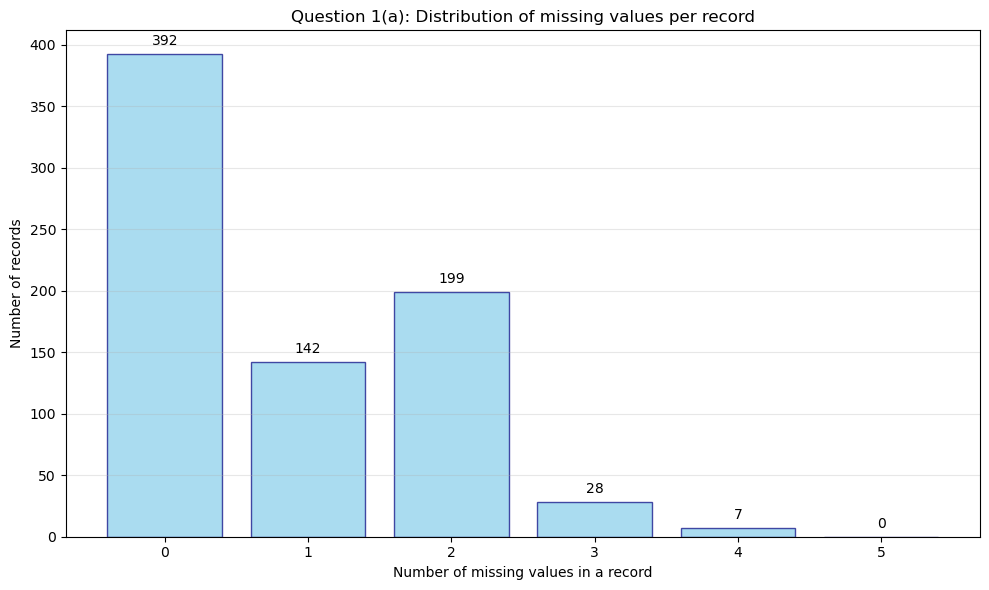

In [4]:
# Question 1(a): Missing values distribution across records

df = pd.read_csv('diabetes.csv')


# Attributes with missing values
missing_attrs = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count missing values per record
missing_per_record = []
for _, row in df.iterrows():
    count = sum(1 for attr in missing_attrs if row[attr] == 0)
    missing_per_record.append(count)

# Distribution of missing counts
missing_distribution = Counter(missing_per_record)


# Plot
plt.figure(figsize=(10, 6))
x_values = list(range(6))
y_values = [missing_distribution.get(i, 0) for i in x_values]

plt.bar(x_values, y_values, color='skyblue', edgecolor='navy', alpha=0.7)
plt.xlabel('Number of missing values in a record')
plt.ylabel('Number of records')
plt.title('Question 1(a): Distribution of missing values per record')
plt.xticks(x_values)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(y_values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

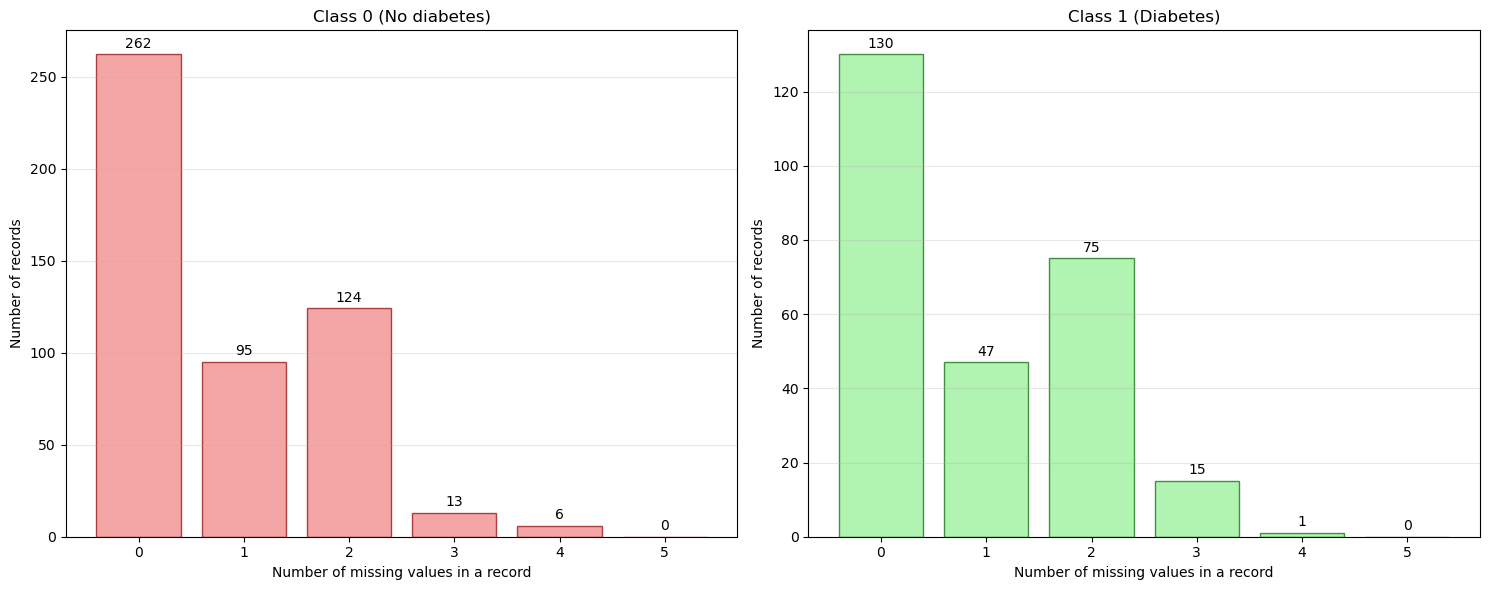

In [7]:
# Question 1(b): Missing values distribution by class

# Read data
df = pd.read_csv('diabetes.csv')
missing_attrs = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Split by class
class_0 = df[df['Outcome'] == 0]
class_1 = df[df['Outcome'] == 1]


def get_missing_distribution(data):
    """Calculate missing values distribution for given data"""
    missing_counts = []
    for _, row in data.iterrows():
        count = sum(1 for attr in missing_attrs if row[attr] == 0)
        missing_counts.append(count)
    return Counter(missing_counts)

# Get distributions for each class
dist_class_0 = get_missing_distribution(class_0)
dist_class_1 = get_missing_distribution(class_1)


# Plot both classes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

x_values = list(range(6))
y_values_0 = [dist_class_0.get(i, 0) for i in x_values]
y_values_1 = [dist_class_1.get(i, 0) for i in x_values]

# Class 0 plot
ax1.bar(x_values, y_values_0, color='lightcoral', edgecolor='darkred', alpha=0.7)
ax1.set_xlabel('Number of missing values in a record')
ax1.set_ylabel('Number of records')
ax1.set_title('Class 0 (No diabetes)')
ax1.set_xticks(x_values)
ax1.grid(axis='y', alpha=0.3)

for i, v in enumerate(y_values_0):
    ax1.text(i, v + 2, str(v), ha='center', va='bottom')

# Class 1 plot
ax2.bar(x_values, y_values_1, color='lightgreen', edgecolor='darkgreen', alpha=0.7)
ax2.set_xlabel('Number of missing values in a record')
ax2.set_ylabel('Number of records')
ax2.set_title('Class 1 (Diabetes)')
ax2.set_xticks(x_values)
ax2.grid(axis='y', alpha=0.3)

for i, v in enumerate(y_values_1):
    ax2.text(i, v + 1, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [9]:
# Question 1(c): Conditional probability P(X=0|Y=0)

df = pd.read_csv('diabetes.csv')
missing_attrs = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Create conditional probability table
prob_table = pd.DataFrame(index=missing_attrs, columns=missing_attrs)

for attr_x in missing_attrs:
    for attr_y in missing_attrs:
        if attr_x == attr_y:
            # P(X=0|X=0) = 1
            prob_table.loc[attr_x, attr_y] = 1.0
        else:
            # Calculate P(X=0|Y=0) = P(X=0 and Y=0) / P(Y=0)
            
            # Count records where Y=0
            y_zero_count = (df[attr_y] == 0).sum()
            
            # Count records where both X=0 and Y=0
            xy_zero_count = ((df[attr_x] == 0) & (df[attr_y] == 0)).sum()
            
            # Calculate conditional probability
            if y_zero_count > 0:
                prob = xy_zero_count / y_zero_count
            else:
                prob = 0
            
            prob_table.loc[attr_x, attr_y] = prob

print("Conditional Probability Table P(X=0|Y=0)")
print("Rows represent X attributes, columns represent Y attributes")
print()

# Convert to numeric and display with 4 decimal places
prob_table_numeric = prob_table.astype(float)
print(prob_table_numeric.round(4))


Conditional Probability Table P(X=0|Y=0)
Rows represent X attributes, columns represent Y attributes

               Glucose  BloodPressure  SkinThickness  Insulin     BMI
Glucose            1.0         0.0000         0.0000   0.0107  0.0000
BloodPressure      0.0         1.0000         0.1454   0.0936  0.6364
SkinThickness      0.0         0.9429         1.0000   0.6070  0.8182
Insulin            0.8         1.0000         1.0000   1.0000  0.9091
BMI                0.0         0.2000         0.0396   0.0267  1.0000


## Question 2:

### (a) When the sample size is extremely large and the number of predictors is small. 

**Answer: Flexible method performs BETTER**

**Rationale:** Large sample size prevents overfitting, allowing flexible methods to capture complex patterns. Few predictors avoid curse of dimensionality.

### (b) When the number of predictors is extremely large but the number of observations is small. 

**Answer: Inflexible method performs BETTER**

**Rationale:** High-dimensional data with few observations leads to overfitting with flexible methods. Inflexible methods have lower variance and provide more stable predictions.

### (c) In cases where the relationship between the predictors and the response is highly non-linear. 

**Answer: Flexible method performs BETTER**

**Rationale:** Inflexible methods assume linear relationships and cannot capture non-linear patterns. Flexible methods can adapt to complex non-linear relationships.

### (d) When the error terms in the data have very high variance.

**Answer: Inflexible method performs BETTER**

**Rationale:** High noise causes flexible methods to fit noise rather than signal. Inflexible methods' lower variance provides more stable results in noisy environments.

## Question 3:

### Inference-focused Application:

**Scenario:** Studying the effect of education spending on student test scores

**Response variable:** Average standardized test scores

**Predictor variables:** Per-pupil spending, teacher-to-student ratio, teacher experience, school facilities quality, socioeconomic status

**Why inference:** The goal is to understand which factors significantly impact student performance and quantify how much additional spending improves outcomes. This helps policymakers allocate education budgets effectively by understanding causal relationships.

### Prediction-focused Application:

**Scenario:** Stock price prediction system

**Response variable:** Next-day stock price

**Predictor variables:** Previous prices, trading volume, market indicators, company earnings, news sentiment, economic indicators

**Why prediction:** The goal is accurate price forecasting for trading decisions. We don't need to understand why specific factors affect prices, only that the model predicts accurately for profit maximization.